<a href="https://colab.research.google.com/github/Droganderon/Colab/blob/main/07_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [176]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

# Initialization

In [177]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20,
                                             random_state=1)
x = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(Y_numpy.astype(np.float32))

y = y.view(y.shape[0],1)

lr = 0.01
n = 1000

#Model

In [178]:
#model = nn.Linear(n_featuresm 1)

In [179]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #difine layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    return self.lin(x)

In [180]:
model = LinearRegression(1,1)

# Loss
Mean square error (MSE)

In [181]:
loss = nn.MSELoss()

# Optimiaer

In [182]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

#Training

In [183]:
for epoch in range(n):
  #prediction
  y_h = model(x)
  #loss
  L = loss(y,y_h)
  #gradient
  L.backward()
  #upgdate
  optimizer.step()
  #zero_gradients
  optimizer.zero_grad()

  if epoch % 100 == 0:
    [w,b] = model.parameters()
    print(f'epoch {epoch + 1}: w = {w[0][0]:.3f}, loss = {L:.5f}')


epoch 1: w = 1.898, loss = 5668.57178
epoch 101: w = 65.973, loss = 553.03802
epoch 201: w = 79.062, loss = 342.12054
epoch 301: w = 81.770, loss = 332.98938
epoch 401: w = 82.335, loss = 332.58633
epoch 501: w = 82.453, loss = 332.56845
epoch 601: w = 82.478, loss = 332.56757
epoch 701: w = 82.483, loss = 332.56757
epoch 801: w = 82.484, loss = 332.56757
epoch 901: w = 82.484, loss = 332.56757


In [184]:
model(torch.tensor([5.0]))

tensor([416.4753], grad_fn=<ViewBackward0>)

In [187]:
preds = model(x).detach().numpy()

#Visualization

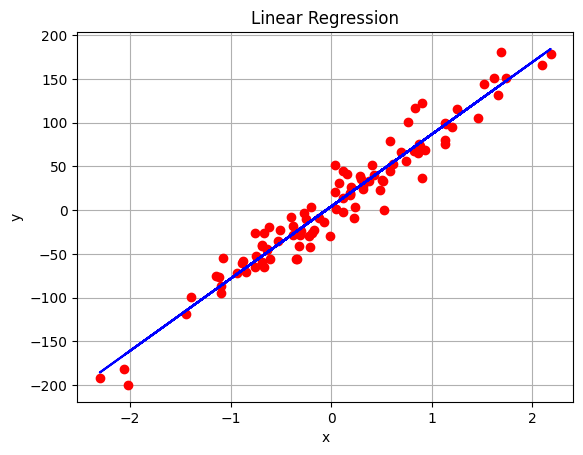

In [188]:
plt.plot(X_numpy, Y_numpy,'ro')
plt.plot(X_numpy, preds,'b')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid('on')